In [1]:
import pandas as pd

In [2]:
#Loading the dataset
matches = pd.read_csv("C:/Users/Dell/Downloads/IPL_dataset/matches.csv")
deliveries = pd.read_csv("C:/Users/Dell/Downloads/IPL_dataset/deliveries.csv")

In [7]:
#Merging to get season in deliveries
match_season = matches[['id','Season']]
df = deliveries.merge(match_season, left_on='match_id', right_on='id')

In [8]:
#Group by Season and Batsman to get total runs
batsman_stats = df.groupby(['Season','batsman'])['batsman_runs'].sum().reset_index()

In [12]:
#Selecting top 5 players for each season
top_batsman = batsman_stats.sort_values(['Season','batsman_runs'], ascending = [True, False]).groupby('Season').head(5)

In [26]:
#Adding strike rate
balls_faced = df[df['wide_runs']==0].groupby(['Season','batsman']).size().reset_index(name='balls_faced')
top_batsman = top_batsman.merge(balls_faced, on=['Season','batsman'], suffixes=('','_new'))
top_batsman['strike_rate'] = (top_batsman['batsman_runs'] / top_batsman['balls_faced_new'])*100
top_batsman['strike_rate'] = top_batsman['strike_rate'].round(2)
top_batsman.head(10)

,Season,batsman,batsman_runs,balls_faced_x,strike_rate,balls_faced_y,balls_faced,balls_faced_new
0,IPL-2008,SE Marsh,616,441,139.68,441,441,441
1,IPL-2008,G Gambhir,534,379,140.90,379,379,379
2,IPL-2008,ST Jayasuriya,514,309,166.34,309,309,309
3,IPL-2008,SR Watson,472,311,151.77,311,311,311
4,IPL-2008,GC Smith,441,362,121.82,362,362,362
5,IPL-2009,ML Hayden,572,395,144.81,395,395,395
6,IPL-2009,AC Gilchrist,495,325,152.31,325,325,325
7,IPL-2009,AB de Villiers,465,355,130.99,355,355,355
8,IPL-2009,SK Raina,434,308,140.91,308,308,308
9,IPL-2009,TM Dilshan,418,341,122.58,341,341,341


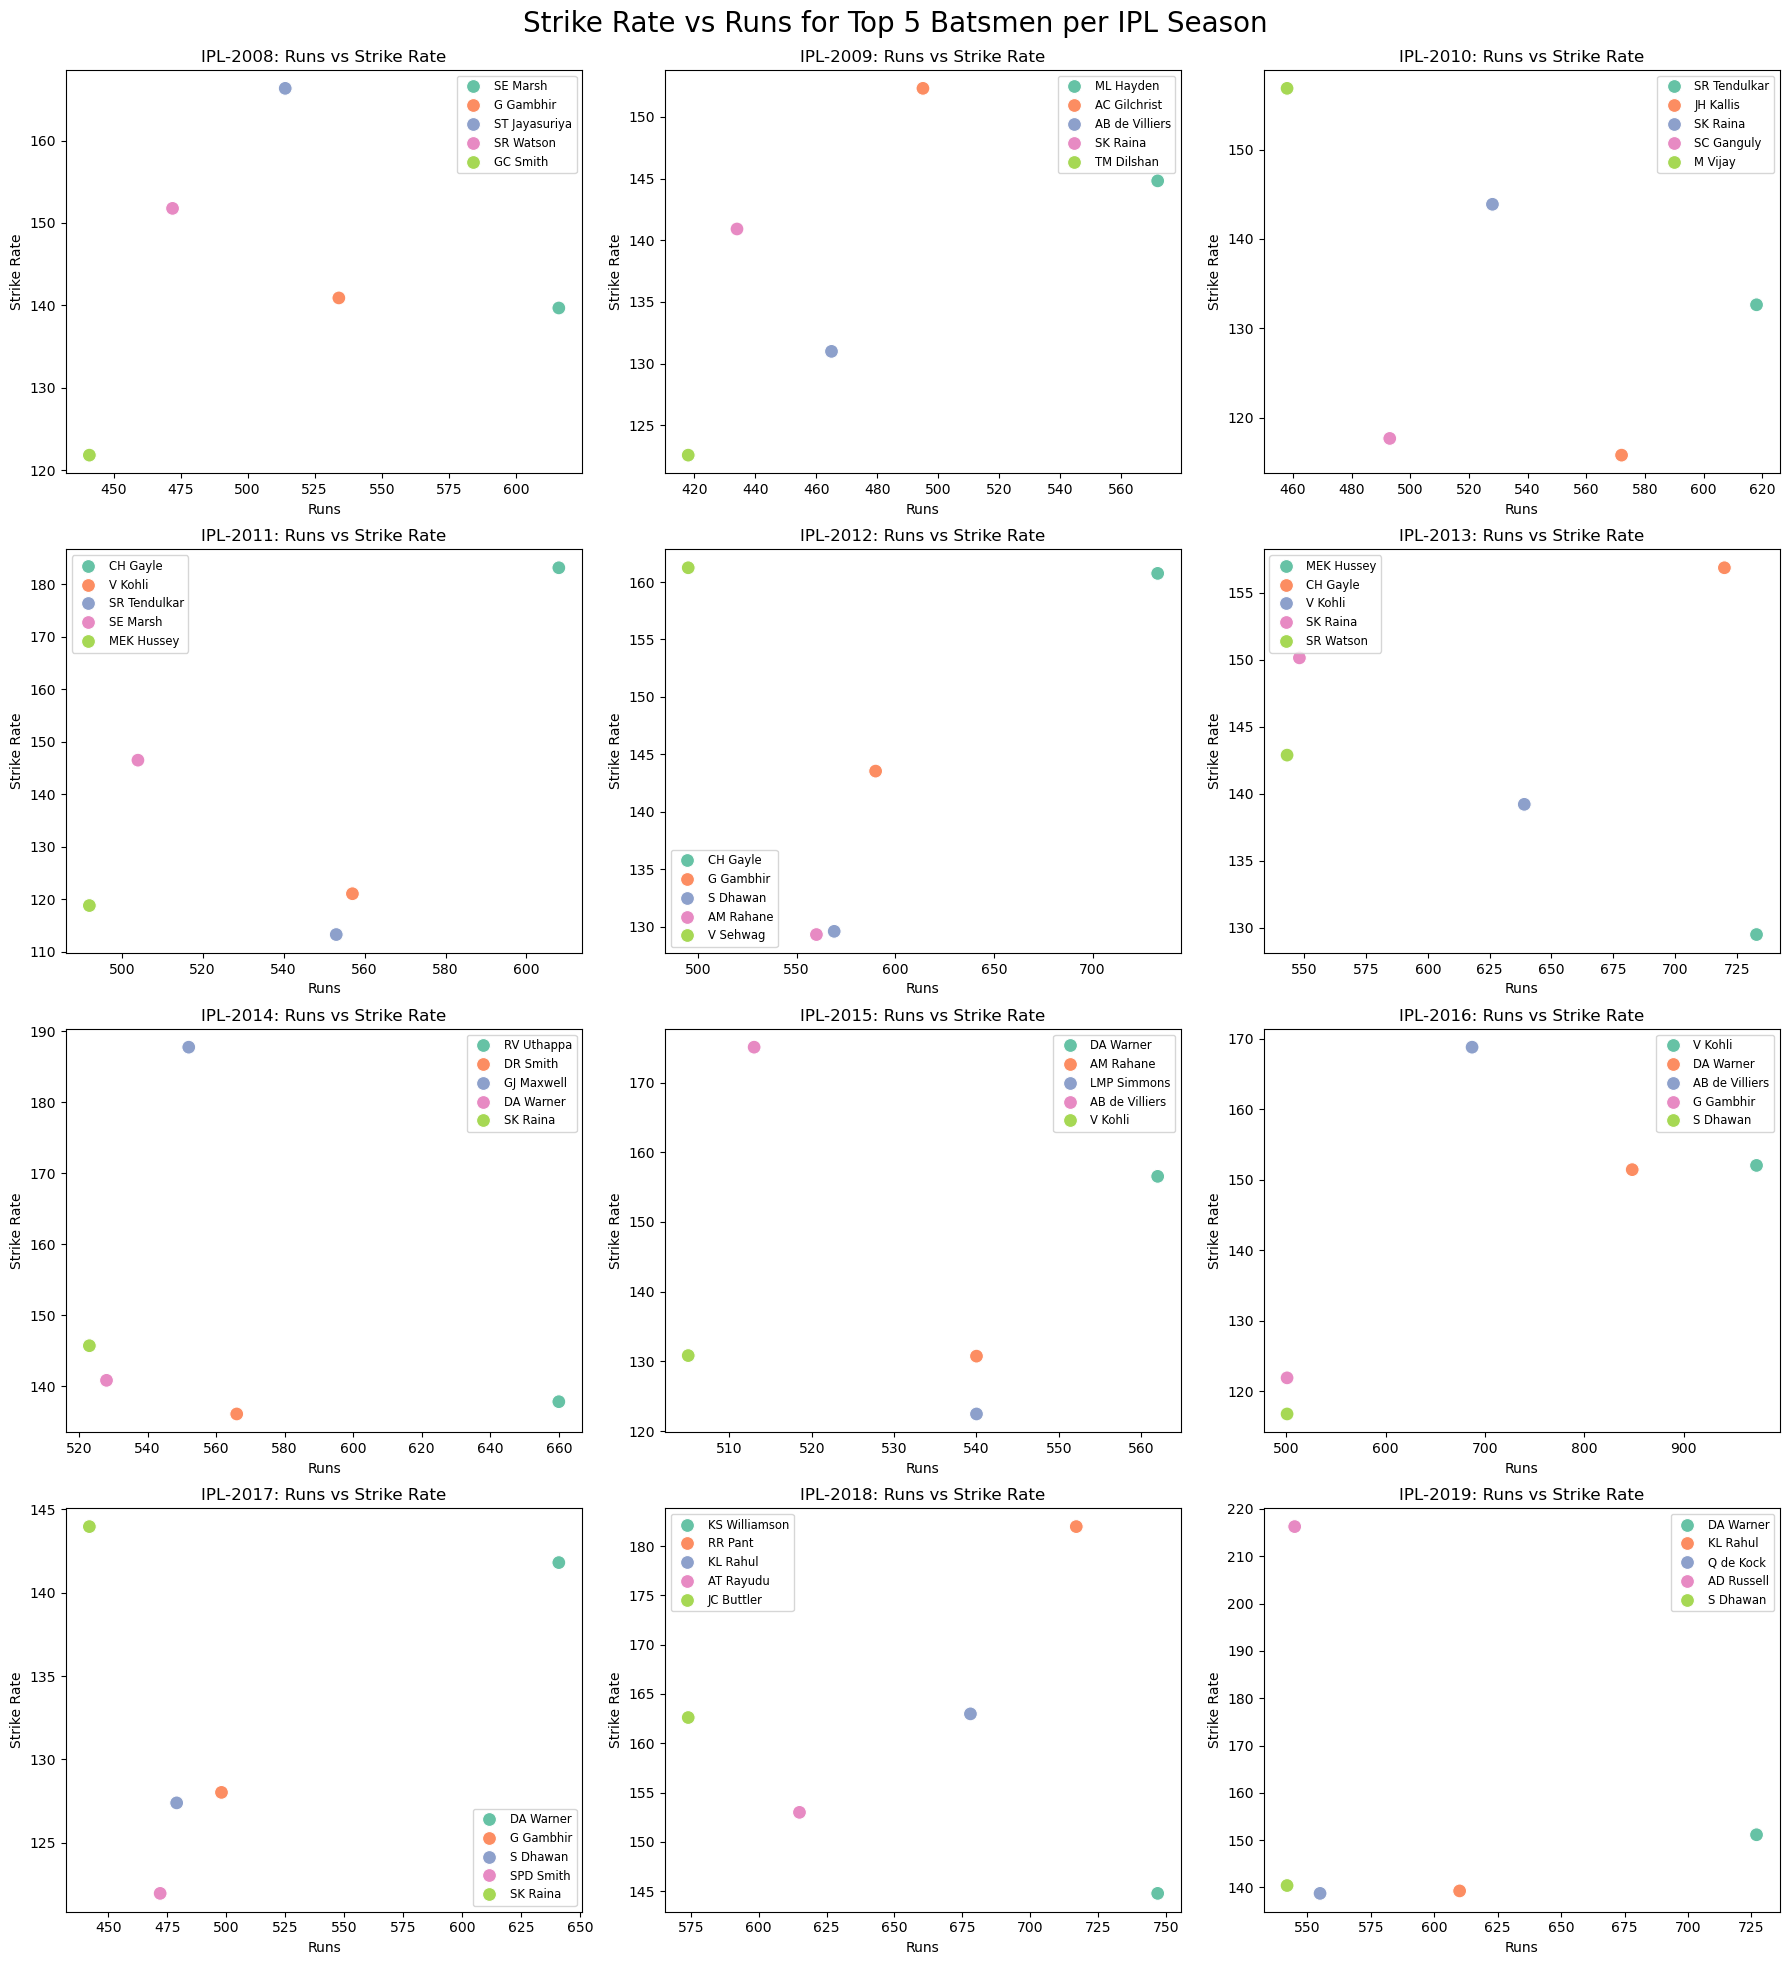

In [28]:
# Scatter plot per season
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(18, 20))
axes = axes.flatten()

seasons = top_batsman['Season'].unique()

for i, season in enumerate(seasons):
    data = top_batsman[top_batsman['Season'] == season]
    sns.scatterplot(data=data, x='batsman_runs', y='strike_rate', hue='batsman', ax=axes[i], s=100, palette='Set2')
    axes[i].set_title(f'{season}: Runs vs Strike Rate')
    axes[i].set_xlabel('Runs')
    axes[i].set_ylabel('Strike Rate')
    axes[i].legend(loc='best', fontsize='small')

# Clean up extra subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

fig.tight_layout()
plt.subplots_adjust(top=0.95)
plt.suptitle('Strike Rate vs Runs for Top 5 Batsmen per IPL Season', fontsize=20)
plt.savefig("top_batsmen_scatter_per_season.png")
plt.show()
